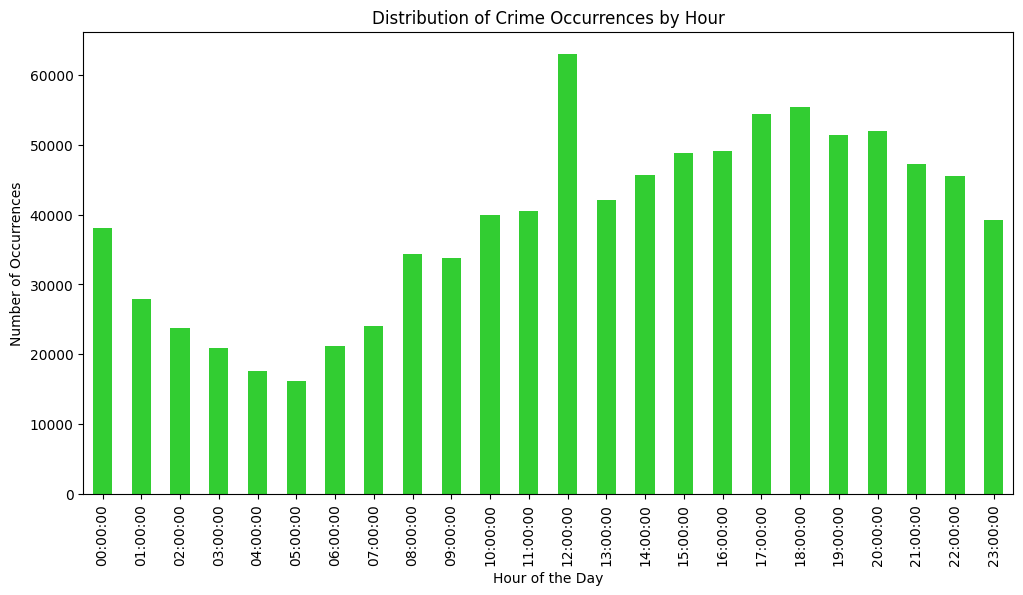

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to pad zeros and extract hour
def pad_zeros_and_extract_hour(time_str):
    return time_str.zfill(4)[:2]

# Function to load the crime data from the CSV file into a pandas DataFrame
def load_data(file_name):
    return pd.read_csv(file_name)

# Function to apply padding zeros and extract hour using list comprehension
def apply_padding_and_extract_hour(data):
    return [pad_zeros_and_extract_hour(str(time)) for time in data]

# Function to convert the hour column to a time format
def convert_to_time_format(data):
    return pd.to_datetime(data, format='%H').dt.time

# Function to count the occurrences for each hour
def count_hourly_occurrences(data):
    return data.value_counts().sort_index()

# Function to plot the distribution of occurrences by hour
def plot_hourly_distribution(hourly_counts):
    plt.figure(figsize=(12, 6))  # Changed figure size to (12, 6)
    hourly_counts.plot(kind='bar', color='limegreen')  # Change color to limegreen
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Occurrences')
    plt.title('Distribution of Crime Occurrences by Hour')
    plt.show()

file_name = 'LosAngeles_Data.csv'
crime_data = load_data(file_name)
crime_data['Hour'] = apply_padding_and_extract_hour(crime_data['TIME OCC'])
crime_data['Hour'] = convert_to_time_format(crime_data['Hour'])
hourly_counts = count_hourly_occurrences(crime_data['Hour'])
plot_hourly_distribution(hourly_counts)


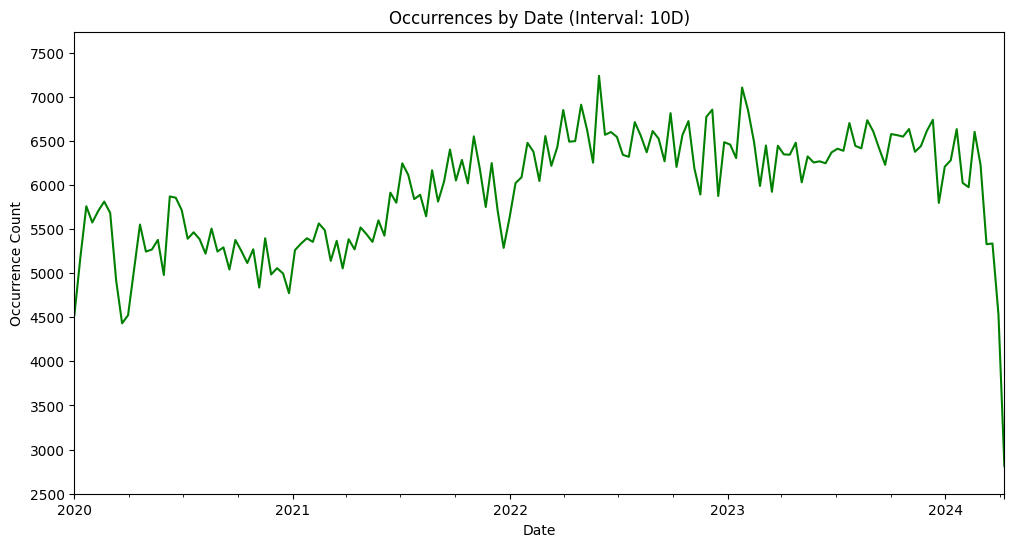

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
def suppress_warnings():
    warnings.filterwarnings('ignore')

# Load the data from the CSV file into a pandas DataFrame
def load_data(file_name):
    return pd.read_csv(file_name)

# Convert the "Date Rptd" column to datetime format
def convert_to_datetime(data):
    data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
    return data

# Set the interval for aggregation (10 days)
def set_interval(interval_value):
    return interval_value + 'D'

# Resample the occurrences by the specified interval
def resample_data(data, interval_value):
    return data.resample(interval_value, on='Date Rptd').size()

# Plot a line chart for occurrences by interval
def plot_occurrences(occurrences, interval_value):
    plt.figure(figsize=(12, 6))
    occurrences.plot(kind='line', color='green')  # Change color to green
    plt.xlabel('Date')
    plt.ylabel('Occurrence Count')
    plt.title('Occurrences by Date (Interval: {})'.format(interval_value))

    # Set the y-axis to start from 2500 and increase by 500
    plt.ylim(2500, max(occurrences) + 500)
    plt.yticks(range(2500, max(occurrences) + 500, 500))  # Set y-axis ticks
    plt.show()

suppress_warnings()
file_name = 'LosAngeles_Data.csv'
data = load_data(file_name)
data = convert_to_datetime(data)
interval_value = '10'
interval = set_interval(interval_value)
occurrences_by_interval = resample_data(data, interval)
plot_occurrences(occurrences_by_interval, interval)


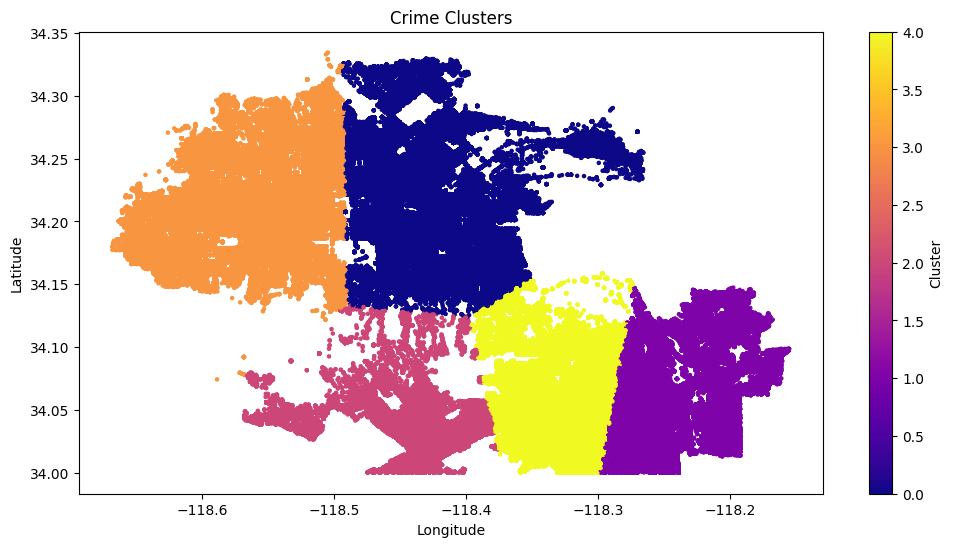

In [ ]:
import pandas as panda
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import warnings

# Suppress warnings
def suppress_warnings():
    warnings.filterwarnings('ignore')

# Load the crime data from the CSV file into a pandas DataFrame
def load_crime_data(file_name):
    return panda.read_csv(file_name)

# Filter the data based on latitude and longitude ranges
def filter_data(data):
    return data[(data['LAT'] >= 34) & (data['LAT'] <= 34.5) &
                (data['LON'] >= -118.9) & (data['LON'] <= -118.1)]

# Select the features for clustering (latitude and longitude)
def select_features(data):
    return data[['LAT', 'LON']]

# Perform K-means clustering
def kmeans_clustering(features, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    return kmeans.fit_predict(features)

# Plot the crime clusters on a scatter plot
def plot_clusters(data, cluster_labels):
    plot.figure(figsize=(12, 6))
    plot.scatter(data['LON'], data['LAT'], c=cluster_labels, cmap='plasma', s=5)
    plot.xlabel('Longitude')
    plot.ylabel('Latitude')
    plot.title('Crime Clusters')
    plot.colorbar(label='Cluster')
    plot.show()

suppress_warnings()
file_name = 'LosAngeles_Data.csv'
crime_data = load_crime_data(file_name)
filtered_data = filter_data(crime_data)
features = select_features(filtered_data)
num_clusters = 5
cluster_labels = kmeans_clustering(features, num_clusters)
plot_clusters(filtered_data, cluster_labels)


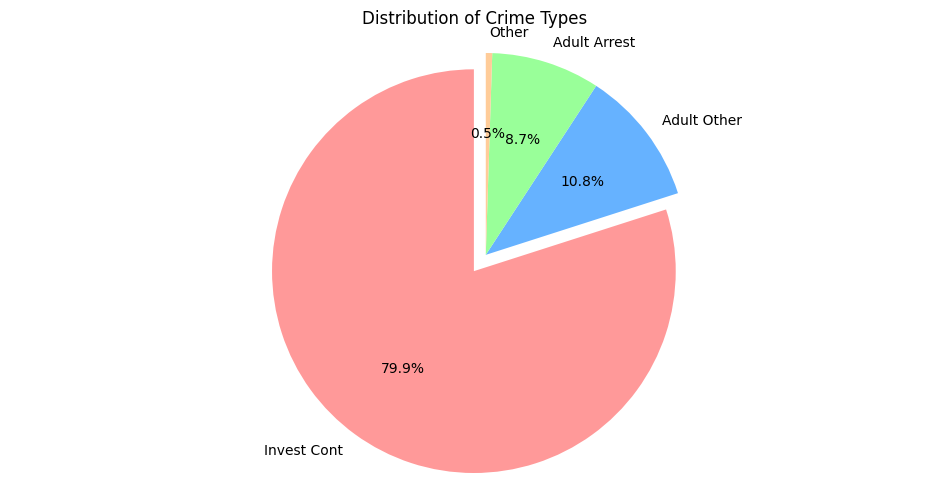

In [ ]:
import pandas as panda
import matplotlib.pyplot as plot

# Load the crime data from the CSV file into a pandas DataFrame
def load_data(file_name):
    return panda.read_csv(file_name)

# Extract the "CRM CD DESC" column
def extract_column(data):
    return data['Status Desc']

# Count the occurrences of each crime description
def count_occurrences(description):
    return description.value_counts()

# Calculate the total count
def calculate_total_count(description):
    return len(description)

# Filter categories with less than a threshold percentage of occurrences
def filter_categories(counts, total_count, threshold):
    filtered_counts = counts[counts / total_count >= threshold]
    other_crimes_count = counts[counts / total_count < threshold].sum()
    filtered_counts['Other'] = other_crimes_count
    return filtered_counts

# Plot a pie chart with custom settings
def plot_pie_chart(counts, custom_colors):
    plot.figure(figsize=(12, 6))
    explode = [0.1] + [0] * (len(counts) - 1)  # Explode the first slice for emphasis
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, colors=custom_colors)
    plot.title('Distribution of Crime Types')
    plot.ylabel('')
    # Ensure a circular pie chart
    plot.axis('equal')
    plot.show()

file_name = 'LosAngeles_Data.csv'
crime_data = load_data(file_name)
crime_description = extract_column(crime_data)
crime_counts = count_occurrences(crime_description)
total_count = calculate_total_count(crime_description)
threshold = 0.015  # 1.5%
filtered_counts = filter_categories(crime_counts, total_count, threshold)
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']
plot_pie_chart(filtered_counts, custom_colors)


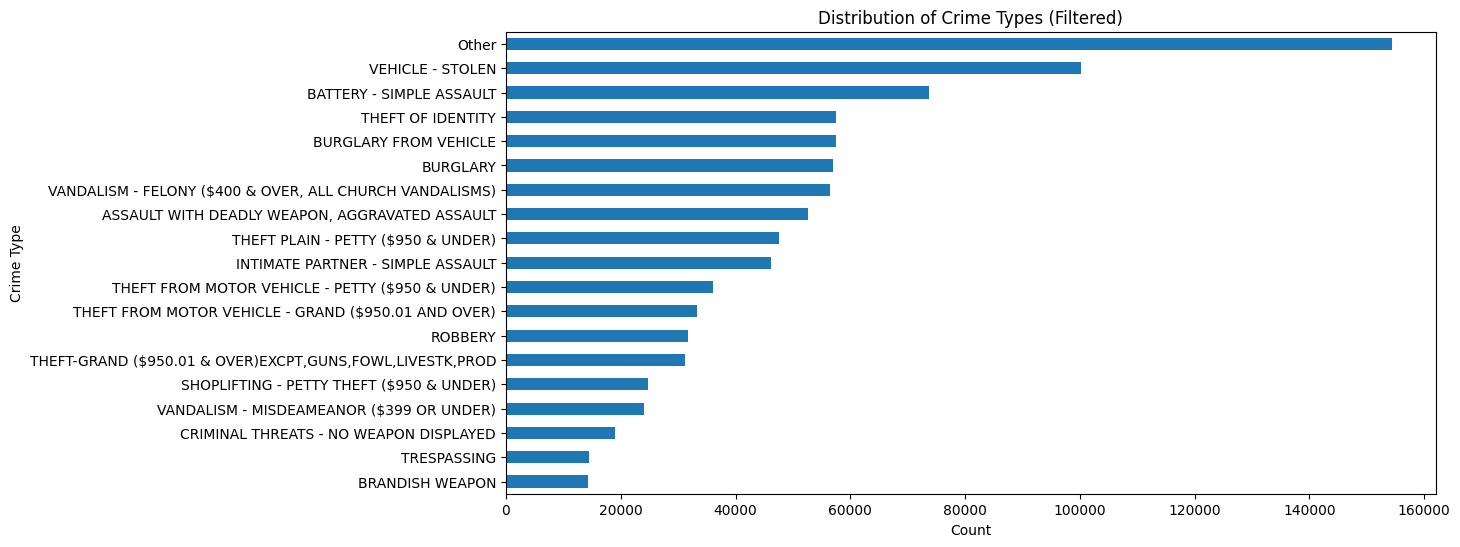

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load crime data from CSV file
def load_crime_data(file_name):
    return pd.read_csv(file_name)

# Function to extract crime description column
def extract_crime_description(data):
    return data['Crm Cd Desc']

# Function to count occurrences of each crime description
def count_occurrences(description):
    return description.value_counts()

# Function to calculate total count of crime descriptions
def calculate_total_count(description):
    return len(description)

# Function to filter categories with less than a threshold percentage of occurrences
def filter_categories(counts, total_count, threshold):
    filtered_counts = counts[counts / total_count >= threshold]
    other_crimes_count = counts[counts / total_count < threshold].sum()
    filtered_counts['Other'] = other_crimes_count
    return filtered_counts

# Function to plot horizontal bar chart
def plot_bar_chart(filtered_counts):
    plt.figure(figsize=(12, 6))
    filtered_counts.sort_values(ascending=True).plot(kind='barh')
    plt.title('Distribution of Crime Types (Filtered)')
    plt.xlabel('Count')
    plt.ylabel('Crime Type')
    plt.show()

file_name = 'LosAngeles_Data.csv'
crime_data = load_crime_data(file_name)
crime_description = extract_crime_description(crime_data)
crime_counts = count_occurrences(crime_description)
total_count = calculate_total_count(crime_description)
threshold = 0.015  # 1.5%
filtered_counts = filter_categories(crime_counts, total_count, threshold)
plot_bar_chart(filtered_counts)


In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
proj-bin is already the newest version (9.1.1-1~jammy0).
proj-data is already the newest version (9.1.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.9 MB/s eta 0:00:00


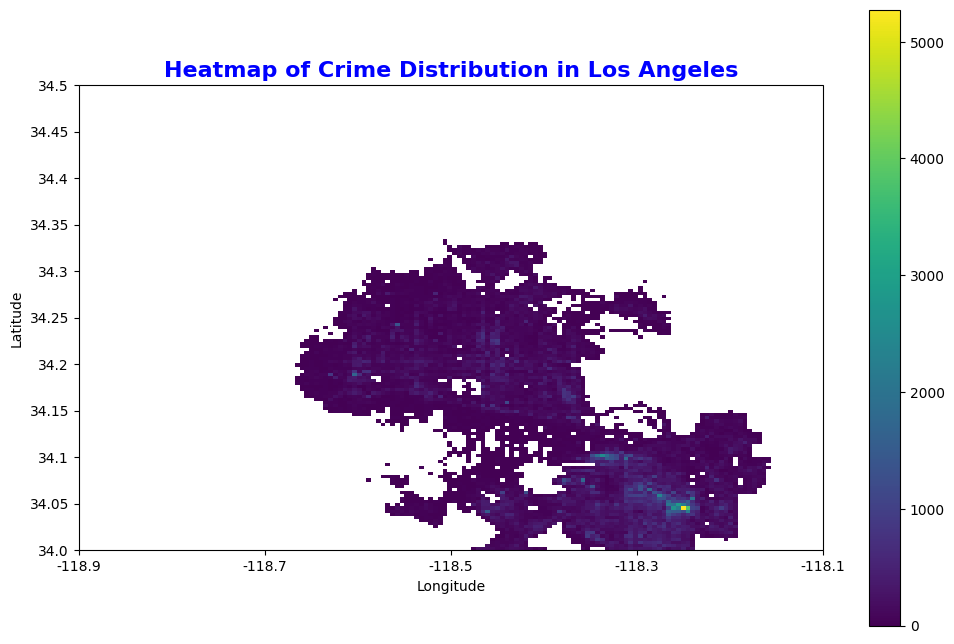

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Function to load data from CSV file
def load_data(file_name):
    return pd.read_csv(file_name)

# Function to filter data based on latitude and longitude ranges
def filter_data(data):
    return data[(data['LAT'] >= 34) & (data['LAT'] <= 34.5) &
                (data['LON'] >= -118.9) & (data['LON'] <= -118)]

# Function to create a heatmap with a different colormap
def create_heatmap(filtered_data):
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    sns.histplot(data=filtered_data, x='LON', y='LAT', bins=100, cmap='viridis', cbar=True)  # Change colormap to 'viridis'
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Heatmap of Crime Distribution in Los Angeles', fontsize=16, fontweight='bold', color='blue')

    # Manually adjust y-axis ticks and labels to increase by 0.05
    y_ticks = [34 + i * 0.05 for i in range(11)]  # Generate y-axis ticks
    y_tick_labels = [str(y) for y in y_ticks]  # Generate y-axis tick labels

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_tick_labels)

    # Manually add latitude and longitude labels
    ax.set_xticks([-118.9, -118.7, -118.5, -118.3, -118.1])
    ax.set_xticklabels(['-118.9', '-118.7', '-118.5', '-118.3', '-118.1'])

    plt.show()

file_name = 'LosAngeles_Data.csv'
data = load_data(file_name)
filtered_data = filter_data(data)
create_heatmap(filtered_data)
